<a href="https://colab.research.google.com/github/BritneyMuller/colab-notebooks/blob/master/MozCon_GSC_Keywords_%7C_Data_Skeptic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Power Up Your Data Skeptic Skills!!!
[Make a copy of this notebook]
<img src="https://defineawesome.com/wp-content/uploads/superman-doggy.png" width=200 align=right>


✍️ **Keywords:**
- Has the # of ranking keywords gone up or down?
-- *How might this affect other metrics?* 
- What is the ranking distribution of keywords
-- *Has this improved from previous period?*
- What keywords are within "striking distance"?
-- *Keywords with solid CTR but on page two 10-20.*
- What are the new vs lost keywords since previous period?
- How are branded vs nonbrand keywords doing?


🖱️ **Clicks:**
- Are total clicks up from previous period?
- How have top clicked pages changed from previous period?




---



---




# Pull Website Data

- Connect GSC to GDS: Export the 2 keyword tables as CSV: 

https://datastudio.google.com/reporting/53fe5326-d1f7-41a4-8796-b6d65c1215e6

1.  April-keywords.csv
2.  May-keywords.csv

#####**Found this double keyword export to work best for more easily detecting new vs. lost keywords.** 
*—Please let me know if you have a better way of doing this!* 🙏 :)

## Import Libraries

In [74]:
!pip install altair
!pip install chart_studio
import csv
import json
import requests
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import cufflinks as cf
!pip install sweetviz
import altair as alt
import pandas as pd

from IPython.display import display

     |████████████████████████████████| 71kB 3.9MB/s 


## Upload both CSVs


In [4]:
from google.colab import files
upload = files.upload()

Saving GSC - Data Skeptic Dashboard for SEOs_Page 1_Table (1).csv to GSC - Data Skeptic Dashboard for SEOs_Page 1_Table (1) (1).csv
Saving GSC - Data Skeptic Dashboard for SEOs_Page 1_Table.csv to GSC - Data Skeptic Dashboard for SEOs_Page 1_Table.csv


## Name Keyword CSVs to individual dataframes

In [5]:
df = pd.read_csv ("GSC - Data Skeptic Dashboard for SEOs_Page 1_Table.csv")
dfp = pd.read_csv ("GSC - Data Skeptic Dashboard for SEOs_Page 1_Table (1).csv")
#naming this dfp (for dataframe previous) because it makes sense to me... feel free to name whatever you'd like and change the use of dfp below to your naming convection. 💚

Check head (first 5 rows) for each dataframes to ensure upload + naming worked:

In [6]:
df.head()
#May keywords

Query  Impressions  Clicks  Site CTR  Average Position
0           google kickball         1150     750  0.652174          1.003478
1               chrome dino       125918     612  0.004860          8.268627
2  google merchandise store        14183     514  0.036241          1.031728
3       youtube merchandise         2635     437  0.165844          1.228463
4            google t shirt         1884     353  0.187367          1.002123

In [7]:
#Make sure you know which month's data is in each dataframe
#Add Column with Month info to each dataframe
df = df.assign(Month ='May')
dfp = dfp.assign(Month ='April')

###Do we currently rank for more or less keywords?

In [8]:
#May keywords minus April keywords:
len(df)-len(dfp)

13713

In [9]:
#You currently rank for 1983 more keywords than you did in April
#Note: This does NOT mean you rank for 1983 NEW KEYWORDS! **we'll get to that :)** 
#Is this good or bad? --Let's try to uncover more info around the quality of keywords

##Outer Join Dataframes


In [10]:
df_outer = pd.merge(df, dfp, on='Query', how='outer')

In [11]:
df_outer.head()

Query  Impressions_x  ...  Average Position_y  Month_y
0           google kickball         1150.0  ...            1.000000    April
1               chrome dino       125918.0  ...            7.004213    April
2  google merchandise store        14183.0  ...            1.052294    April
3       youtube merchandise         2635.0  ...            1.827776    April
4            google t shirt         1884.0  ...            1.019313    April

[5 rows x 11 columns]

In [12]:
df_outer.tail()

Query  Impressions_x  ...  Average Position_y  Month_y
28476                 nootblok            NaN  ...                10.0    April
28477              -130 f to c            NaN  ...                40.0    April
28478              shepra vest            NaN  ...                 9.0    April
28479  oem 25x25x30cm mesh bag            NaN  ...                 1.5    April
28480                  play st            NaN  ...                 NaN    April

[5 rows x 11 columns]

###Clean up column names

In [13]:
df_outer = df_outer.rename(columns={"Impressions_x":"May Impressions","Clicks_x": "May Clicks", "Site CTR_x": "May CTR", "Average Position_x":"May Rank"})
df_outer = df_outer.rename(columns={"Month_x":"May", "Impressions_y":"April Impressions", "Clicks_y": "April Clicks", "Site CTR_y": "April CTR", "Average Position_y":"April Rank", "Month_y":"April" })


In [14]:
df_outer.head()

Query  May Impressions  ...  April Rank  April
0           google kickball           1150.0  ...    1.000000  April
1               chrome dino         125918.0  ...    7.004213  April
2  google merchandise store          14183.0  ...    1.052294  April
3       youtube merchandise           2635.0  ...    1.827776  April
4            google t shirt           1884.0  ...    1.019313  April

[5 rows x 11 columns]

#Gained Keywords

Let's look at our outer join with "NaN" for the month of April (meaning the keyword didn't exist in April) to find out:

In [15]:
df_outer[df_outer['April Rank'].isna()]

Query  ...  April
61                                google kick ball  ...    NaN
113                                グーグルマーチャンダイズストア  ...    NaN
141    /google+redesign/apparel/mens/mens+t+shirts  ...    NaN
168                         google camp charleston  ...    NaN
179                              googleマーチャンダイズストア  ...    NaN
...                                            ...  ...    ...
24912                        small cable organiser  ...    NaN
24913                                googles stand  ...    NaN
24914                                  google mite  ...    NaN
24915                           google polo shirts  ...    NaN
28480                                      play st  ...  April

[17279 rows x 11 columns]

Note: The total number of rows in the bottom left corner (9881 rows x 11 columns) = number of new ranking keywords for May = 9881




#Lost Keywords

In [16]:
df_outer[df_outer['May Rank'].isna()]

Query  ...  April
24916  google+redesign/shop+by+brand/youtube  ...  April
24917                    qwiklabs perk store  ...  April
24918                     google baby onesie  ...  April
24919                       google bag price  ...  April
24920                  google store clothing  ...  April
...                                      ...  ...    ...
28476                               nootblok  ...  April
28477                            -130 f to c  ...  April
28478                            shepra vest  ...  April
28479                oem 25x25x30cm mesh bag  ...  April
28480                                play st  ...  April

[3565 rows x 11 columns]

##Sort lost keywords by clicks


In [17]:
%load_ext google.colab.data_table

#Run code below in green to disable table
#%unload_ext google.colab.data_table
df_outer[df_outer['May Rank'].isna()]

Query  ...  April
24916  google+redesign/shop+by+brand/youtube  ...  April
24917                    qwiklabs perk store  ...  April
24918                     google baby onesie  ...  April
24919                       google bag price  ...  April
24920                  google store clothing  ...  April
...                                      ...  ...    ...
28476                               nootblok  ...  April
28477                            -130 f to c  ...  April
28478                            shepra vest  ...  April
28479                oem 25x25x30cm mesh bag  ...  April
28480                                play st  ...  April

[3565 rows x 11 columns]

#Keyword Rank Distribution:

May Distribution:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



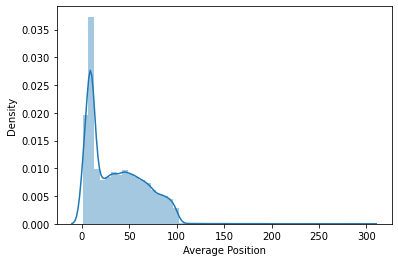

In [18]:
sns.distplot(df['Average Position'])

####April Distribution:
Careful: Notice the X & Y axis change

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



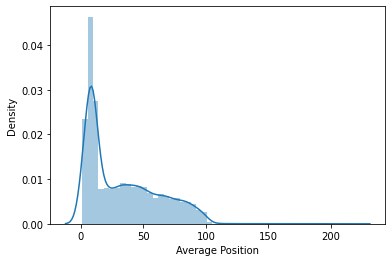

In [19]:
sns.distplot(dfp['Average Position'])

## Add Comparison Columns 

In [20]:
# Rename columns to your preference
#def x(May Impressions, April Impressions)
 # return May Impressions - April Impressions
  
df_outer['Imp Change'] = df_outer['May Impressions'] - df_outer['April Impressions']
df_outer['Clicks Change'] = df_outer['May Clicks'] - df_outer['April Clicks']
#Most people screw up percentage changes...don't be that person! (https://towardsdatascience.com/most-people-screw-up-multiple-percent-changes-heres-how-to-do-get-them-right-b86bd6ef4b72)
#Here we will kind of be that person. Ha! Adding a column for the CTR percentage change via Basis Point 
#(abbreviated as "bps" & commonly referred to as "bips")
df_outer['CTR Change(bps)'] = df_outer['May CTR'] - df_outer['April CTR'] 
df_outer['Rank Change'] = df_outer['May Rank'] - df_outer['April Rank']


df_outer.head()

Query  May Impressions  ...  CTR Change(bps)  Rank Change
0           google kickball           1150.0  ...        -0.026725     0.003478
1               chrome dino         125918.0  ...        -0.008363     1.264414
2  google merchandise store          14183.0  ...        -0.005662    -0.020566
3       youtube merchandise           2635.0  ...         0.017805    -0.599313
4            google t shirt           1884.0  ...         0.003354    -0.017190

[5 rows x 15 columns]

Drop Extra Columns like a bad keyword stuffing habit(since we made the change columns) 
Naming this cleaned dataframe "cln"

In [21]:
cln = df_outer.drop(columns=['April Impressions', 'April CTR', 'April Rank', 'April', 'May'])
cln.head()

Query  May Impressions  ...  CTR Change(bps)  Rank Change
0           google kickball           1150.0  ...        -0.026725     0.003478
1               chrome dino         125918.0  ...        -0.008363     1.264414
2  google merchandise store          14183.0  ...        -0.005662    -0.020566
3       youtube merchandise           2635.0  ...         0.017805    -0.599313
4            google t shirt           1884.0  ...         0.003354    -0.017190

[5 rows x 10 columns]

##Evaluate the distribution of this dataset
#####Looking at May Clicks below we can observe that only the top 25% of queries have between 0 and 750 clicks. The other 75% have 0.

You can evaluate the rest of the column's distribution by evaluating the min, 25%, 50%, 75%, and max columns.

Don't sleep on the mean & std metrics either!

In [22]:
cln.describe()

May Impressions    May Clicks  ...  CTR Change(bps)  Rank Change
count     24916.000000  24916.000000  ...      7638.000000  7638.000000
mean         63.422459      0.482943  ...        -0.003412     0.529700
std        1386.260549      9.747134  ...         0.044823    13.775468
min           1.000000      0.000000  ...        -1.000000  -102.333333
25%           1.000000      0.000000  ...         0.000000    -2.570873
50%           3.000000      0.000000  ...         0.000000     0.328176
75%          10.000000      0.000000  ...         0.000000     3.874563
max      125918.000000    750.000000  ...         1.000000    93.000000

[8 rows x 9 columns]

In [23]:
# Check for null values in the dataset
cln.isnull().sum()

Query                  0
May Impressions     3565
May Clicks          3565
May CTR             3565
May Rank            3565
April Clicks       17279
Imp Change         20843
Clicks Change      20843
CTR Change(bps)    20843
Rank Change        20843
dtype: int64

In [24]:
# Filters to rows where Impressions Difference has a null value
cln[cln['Imp Change'].isnull()]

Query  ...  Rank Change
61                                google kick ball  ...          NaN
113                                グーグルマーチャンダイズストア  ...          NaN
141    /google+redesign/apparel/mens/mens+t+shirts  ...          NaN
168                         google camp charleston  ...          NaN
179                              googleマーチャンダイズストア  ...          NaN
...                                            ...  ...          ...
28476                                     nootblok  ...          NaN
28477                                  -130 f to c  ...          NaN
28478                                  shepra vest  ...          NaN
28479                      oem 25x25x30cm mesh bag  ...          NaN
28480                                      play st  ...          NaN

[20843 rows x 10 columns]

Replace all NaN values in dataset with 0

In [25]:
cln = cln.fillna(0)
cln.isnull().sum()

Query              0
May Impressions    0
May Clicks         0
May CTR            0
May Rank           0
April Clicks       0
Imp Change         0
Clicks Change      0
CTR Change(bps)    0
Rank Change        0
dtype: int64

Explore what data types Pandas considers your columns to be in

In [26]:
cln.dtypes

Query               object
May Impressions    float64
May Clicks         float64
May CTR            float64
May Rank           float64
April Clicks       float64
Imp Change         float64
Clicks Change      float64
CTR Change(bps)    float64
Rank Change        float64
dtype: object

Change Imp Change & Clicks Change to integers for better evaluation

In [27]:
cln['Imp Change'] = cln['Imp Change'].astype('int64')
cln['Clicks Change'] = cln['Clicks Change'].astype('int64')
cln.dtypes

Query               object
May Impressions    float64
May Clicks         float64
May CTR            float64
May Rank           float64
April Clicks       float64
Imp Change           int64
Clicks Change        int64
CTR Change(bps)    float64
Rank Change        float64
dtype: object

#Identify Question Keywords

In [28]:
questions = cln[(cln['Query'].str.contains('(does|who|will|why|what|where|when|how|can|\?|was|were|being|been|versus|vs|vs\.|best)', 
                                           regex=True)==True)]
questions.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



Query  ...  Rank Change
142                          how to get google t shirt  ...     0.375199
325  how to get google developer t-shirt for free 2021  ...     1.058456
399                    how much is a google bike worth  ...    -3.022500
414                         how to get google stickers  ...     0.104167
452                    how to get google cloud goodies  ...    -0.773504
475                          google store cancel order  ...    -0.971429
605                    how to get google cloud t-shirt  ...    -0.788889
660               how long does google fi take to ship  ...    -2.684898
719                        where does google ship from  ...    -0.064286
740                          how to get google goodies  ...    -0.699301

[10 rows x 10 columns]

In [29]:
 questions.to_csv('All SOA GSC Questions.csv')

## Create A New Brand vs Non-Brand Column

In [30]:
#The "google|chrome|youtube" below is regex and can be modified for your data:
cln["Brand vs Non"]=cln.Query.str.contains("google|chrome|youtube")
#mask = cln.applymap(type) != bool
#d = {True: 'Brand', False: 'Non-Brand'}
#cln = cln.where(mask, cln.replace(d))
cln.head(10)

Query  May Impressions  ...  Rank Change  Brand vs Non
0           google kickball           1150.0  ...     0.003478          True
1               chrome dino         125918.0  ...     1.264414          True
2  google merchandise store          14183.0  ...    -0.020566          True
3       youtube merchandise           2635.0  ...    -0.599313          True
4            google t shirt           1884.0  ...    -0.017190          True
5                 dino game          67776.0  ...     2.505450         False
6                      dino          26171.0  ...     0.637652         False
7             youtube merch           2531.0  ...    -0.655926          True
8             dinosaur game          99671.0  ...     3.157922         False
9             youtube store           1343.0  ...    -0.174687          True

[10 rows x 11 columns]

###Add a rounded rank column

In [31]:
cln['Rounded Rank'] = cln['May Rank'].round(0).astype('int64')
cln.head(30)

Query  May Impressions  ...  Brand vs Non  Rounded Rank
0            google kickball           1150.0  ...          True             1
1                chrome dino         125918.0  ...          True             8
2   google merchandise store          14183.0  ...          True             1
3        youtube merchandise           2635.0  ...          True             1
4             google t shirt           1884.0  ...          True             1
5                  dino game          67776.0  ...         False             8
6                       dino          26171.0  ...         False            10
7              youtube merch           2531.0  ...          True             1
8              dinosaur game          99671.0  ...         False            11
9              youtube store           1343.0  ...          True             2
10           google stickers           1399.0  ...          True             2
11               dino chrome          19736.0  ...          True             9
12              youtube shop            966.0  ...          True             2
13             chrome://dino          48084.0  ...          True             8
14        google merchandise           2833.0  ...          True             1
15             google tshirt            635.0  ...          True             1
16              google shirt           1198.0  ...          True             1
17             google hoodie            601.0  ...          True             1
18             google magnet            419.0  ...          True             1
19           google backpack           3946.0  ...          True             3
20              chrome//dino          35905.0  ...          True             8
21            google apparel            447.0  ...          True             1
22                google hat           2539.0  ...          True             2
23               google dino          15872.0  ...          True            10
24               google bike           3212.0  ...          True             4
25              google merch           2103.0  ...          True             1
26            google t-shirt            462.0  ...          True             1
27              google socks            698.0  ...          True             1
28               dino google           5024.0  ...          True             9
29                google bag            784.0  ...          True             1

[30 rows x 12 columns]

In [32]:
cln.dtypes

Query               object
May Impressions    float64
May Clicks         float64
May CTR            float64
May Rank           float64
April Clicks       float64
Imp Change           int64
Clicks Change        int64
CTR Change(bps)    float64
Rank Change        float64
Brand vs Non          bool
Rounded Rank         int64
dtype: object

# Keyword Opportunities

In [33]:
cln[(cln['Rounded Rank'] >= 9) & (cln['Rounded Rank'] <= 20)]

Query  May Impressions  ...  Brand vs Non  Rounded Rank
6                    dino          26171.0  ...         False            10
8           dinosaur game          99671.0  ...         False            11
11            dino chrome          19736.0  ...          True             9
23            google dino          15872.0  ...          True            10
28            dino google           5024.0  ...          True             9
...                   ...              ...  ...           ...           ...
24904           google. t             11.0  ...          True            11
24907         rav youtube              2.0  ...          True             9
24908   dino google games              2.0  ...          True            10
24914         google mite              2.0  ...          True            11
24915  google polo shirts              3.0  ...          True            13

[5746 rows x 12 columns]

In [34]:
#Let's disable the filterable table:
%unload_ext google.colab.data_table
#reload_ext google.colab.data_table to enable again

### CTR Curve
Aggregates the data into pivot tables to create a CTR curve.

##### Total Site

In [55]:
# Creates a pivot table that averages the Site CTR by the Rounded Position. 
ctr_pivot = cln.pivot_table(index=('Rounded Rank'), values=['May CTR'], aggfunc={'May CTR':"mean"}).sort_values(by=['Rounded Rank'], ascending=True)
ctr_pivot.head(10)

May CTR
Rounded Rank          
0             0.000000
1             0.054850
2             0.033007
3             0.026152
4             0.015025
5             0.013900
6             0.005779
7             0.003231
8             0.005003
9             0.002197

Text(0.5, 1.0, 'Total Site CTR Curve')

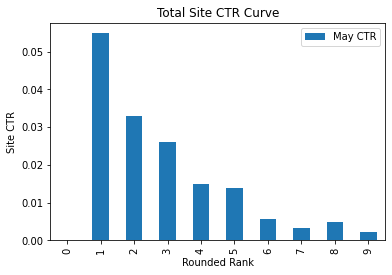

In [56]:
ax = ctr_pivot.head(10).plot(kind='bar')
ax.set_ylabel('Site CTR')
ax.set_title('Total Site CTR Curve')

In [48]:
cln.dtypes

Query               object
May Impressions    float64
May Clicks         float64
May CTR            float64
May Rank           float64
April Clicks       float64
Imp Change           int64
Clicks Change        int64
CTR Change(bps)    float64
Rank Change        float64
Brand vs Non          bool
Rounded Rank         int64
dtype: object

##### Brand

In [64]:
#Change boolean values to categorical
mask = cln.applymap(type) != bool
d = {True: 'Brand', False: 'Non-Brand'}

cln = cln.where(mask, cln.replace(d))

In [65]:
brand_ctr_pivot = cln[cln["Brand vs Non"]=="Brand"].pivot_table(index=('Rounded Rank'), values=['May CTR'], aggfunc={'May CTR':"mean"}).sort_values(by=['Rounded Rank'], ascending=True)
brand_ctr_pivot.head(10)

May CTR
Rounded Rank          
0             0.000000
1             0.130856
2             0.060007
3             0.046344
4             0.028295
5             0.015421
6             0.006778
7             0.004393
8             0.006268
9             0.002786

Text(0.5, 1.0, 'Brand Site CTR Curve')

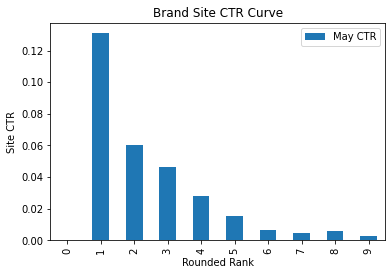

In [66]:
ax_brand = brand_ctr_pivot.head(10).plot(kind='bar')
ax_brand.set_ylabel('Site CTR')
ax_brand.set_title('Brand Site CTR Curve')

In [67]:
nonbrand_ctr_pivot = cln[cln["Brand vs Non"]=="Non-Brand"].pivot_table(index=('Rounded Rank'), values=['May CTR'], aggfunc={'May CTR':"mean"}).sort_values(by=['Rounded Rank'], ascending=True)
nonbrand_ctr_pivot.head(10)

May CTR
Rounded Rank          
0             0.000000
1             0.011125
2             0.017035
3             0.012526
4             0.005172
5             0.012817
6             0.005048
7             0.002326
8             0.003946
9             0.001792

Text(0.5, 1.0, 'Non-Brand Site CTR Curve')

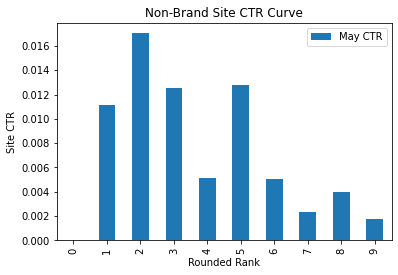

In [68]:
ax_brand = nonbrand_ctr_pivot.head(10).plot(kind='bar')
ax_brand.set_ylabel('Site CTR')
ax_brand.set_title('Non-Brand Site CTR Curve')

### Ranking Distribution

##### Total Site

In [69]:
#Drop lost keywords = 0 Rounded Rank
cln.drop(cln.loc[cln['Rounded Rank'] ==0].index, inplace=True)

In [70]:
rank_pivot = cln.pivot_table(index=('Rounded Rank'), values=['Query'], aggfunc={'Query':"count"}).sort_values(by=['Rounded Rank'], ascending=True)
rank_pivot.head(20)

Query
Rounded Rank       
1               994
2               339
3               273
4               291
5               351
6               492
7               662
8              1107
9              1080
10             1321
11              823
12              598
13              379
14              312
15              203
16              250
17              167
18              242
19              168
20              203

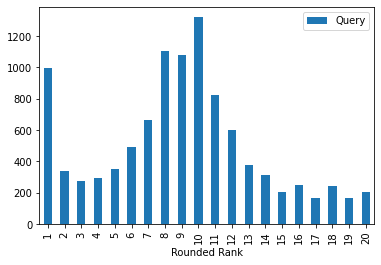

In [71]:
ax = rank_pivot.head(20).plot(kind='bar')
#ax.set_ylabel('Count of Queries')
#ax.set_title('Total Ranking Distribution')

##### Brand

In [72]:
brand_ranking_pivot = cln[cln['Brand vs Non']=='Brand'].pivot_table(index=('Rounded Rank'), values=['Query'], aggfunc={'Query':"count"}).sort_values(by=['Rounded Rank'], ascending=True)
brand_ranking_pivot.head(20)

Query
Rounded Rank       
1               363
2               126
3               110
4               124
5               146
6               208
7               290
8               504
9               440
10              549
11              307
12              181
13              106
14              102
15               82
16              103
17               58
18               94
19               77
20               77

Text(0.5, 1.0, 'Brand Ranking Distribution')

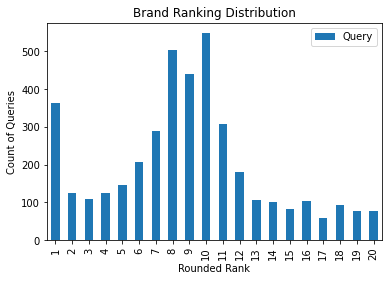

In [76]:
ax = brand_ranking_pivot.head(20).plot(kind='bar')
ax.set_ylabel('Count of Queries')
ax.set_title('Brand Ranking Distribution')

##### Non-Brand

In [77]:
non_brand_ranking_pivot = cln[cln['Brand vs Non']=='Non-Brand'].pivot_table(index=('Rounded Rank'), values=['Query'], aggfunc={'Query':"count"}).sort_values(by=['Rounded Rank'], ascending=True)
non_brand_ranking_pivot.head(20)

Query
Rounded Rank       
1               631
2               213
3               163
4               167
5               205
6               284
7               372
8               603
9               640
10              772
11              516
12              417
13              273
14              210
15              121
16              147
17              109
18              148
19               91
20              126

Text(0.5, 1.0, 'Non-Brand Ranking Distribution')

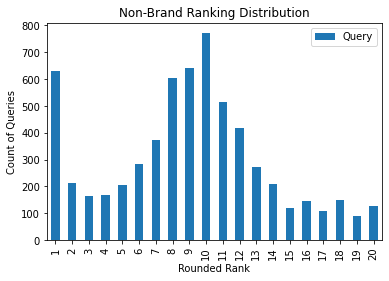

In [78]:
ax = non_brand_ranking_pivot.head(20).plot(kind='bar')
ax.set_ylabel('Count of Queries')
ax.set_title('Non-Brand Ranking Distribution')

#####Big opportunity for rank 8-12 keywords above!!!

## Extra: Play with vizualization tools

In [86]:
#Altair has a 5000 row limit
#create new df that drops any Queries below 5 May Clicks to fit this constraint
fresh = cln[cln['May Clicks'] > 5]  
fresh.head()

Query  May Impressions  ...  Brand vs Non  Rounded Rank
0           google kickball           1150.0  ...         Brand             1
1               chrome dino         125918.0  ...         Brand             8
2  google merchandise store          14183.0  ...         Brand             1
3       youtube merchandise           2635.0  ...         Brand             1
4            google t shirt           1884.0  ...         Brand             1

[5 rows x 12 columns]

In [87]:
alt.Chart(fresh).mark_point().encode(
    x='May Clicks',
    y='Rounded Rank',
    color='Brand vs Non',
    tooltip='Query'
).properties(
    title='Organic clicks vs. rank data'
).interactive()

alt.Chart(...)

                                             |          | [  0%]   00:00 -> (? left)


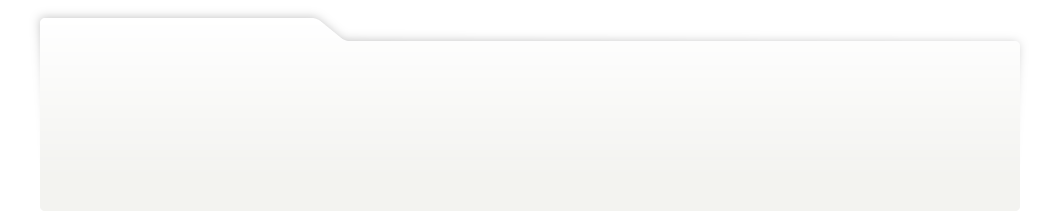
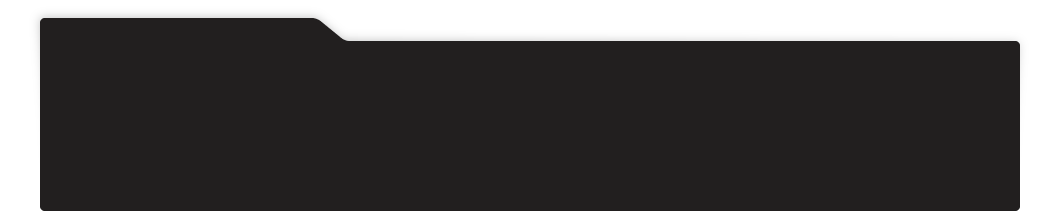
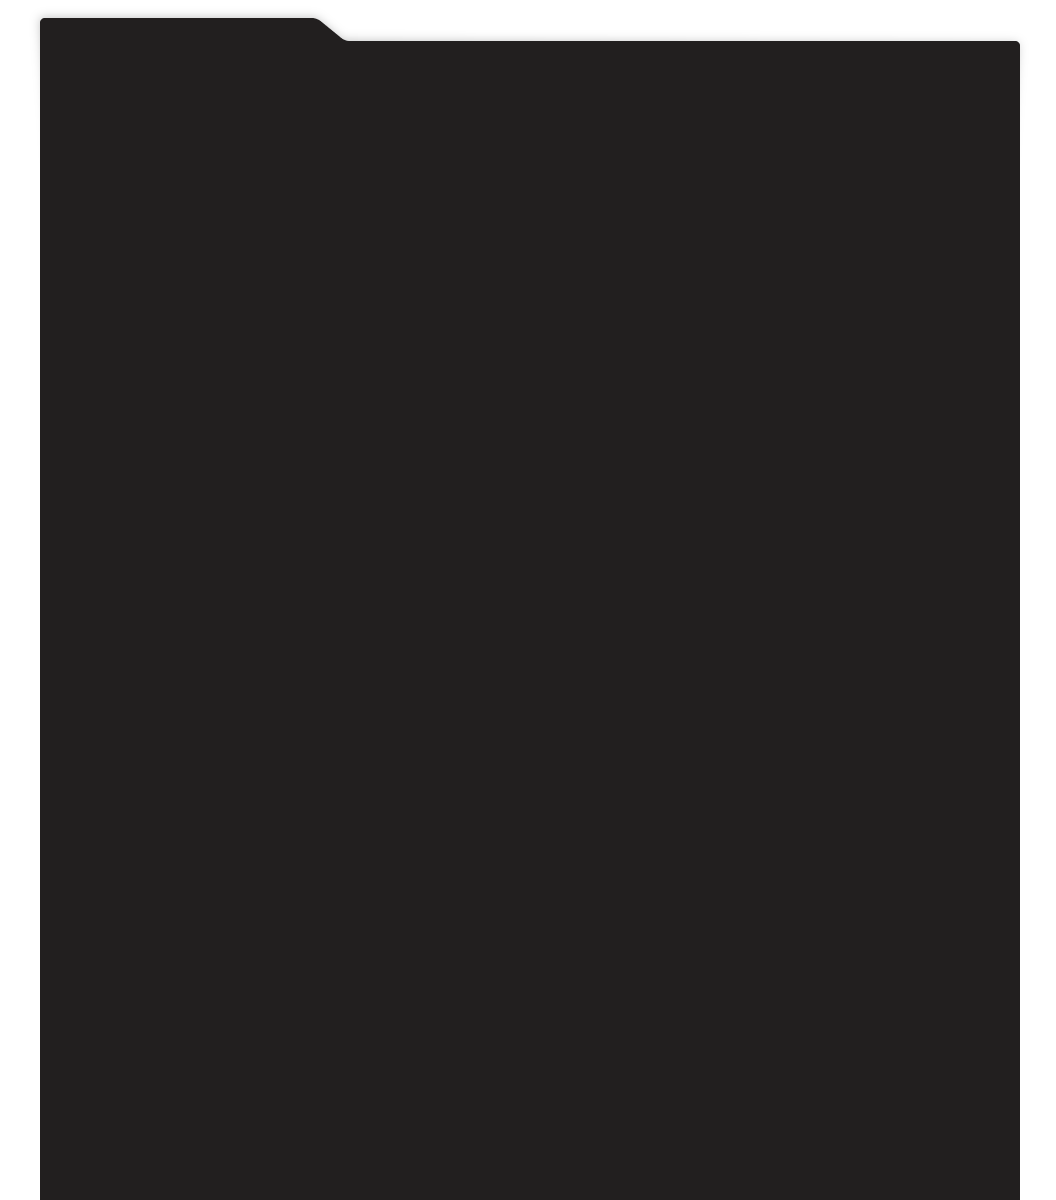
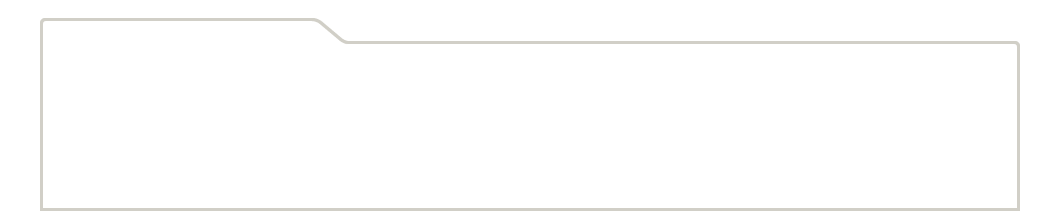
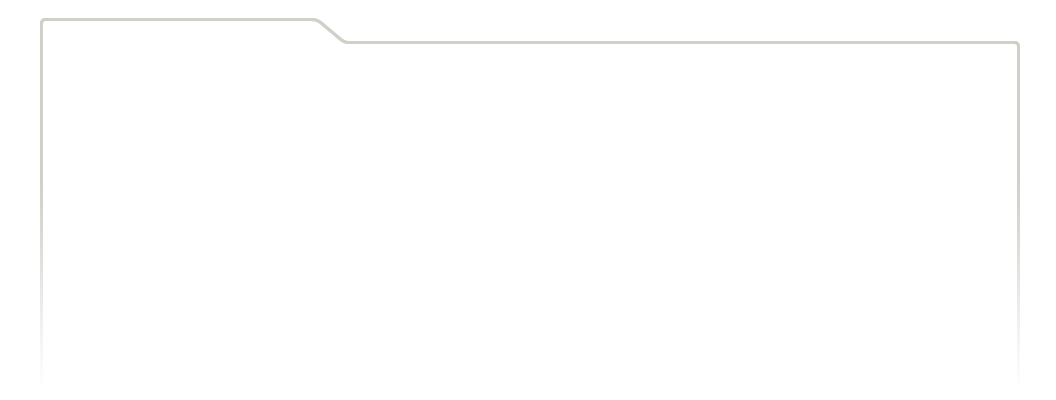
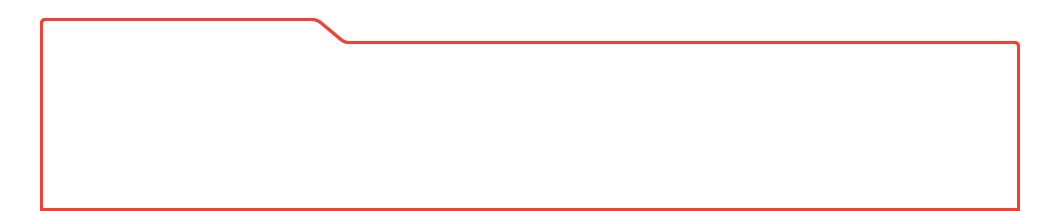
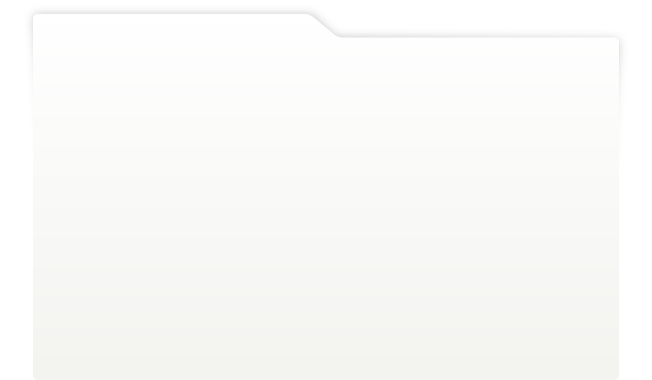
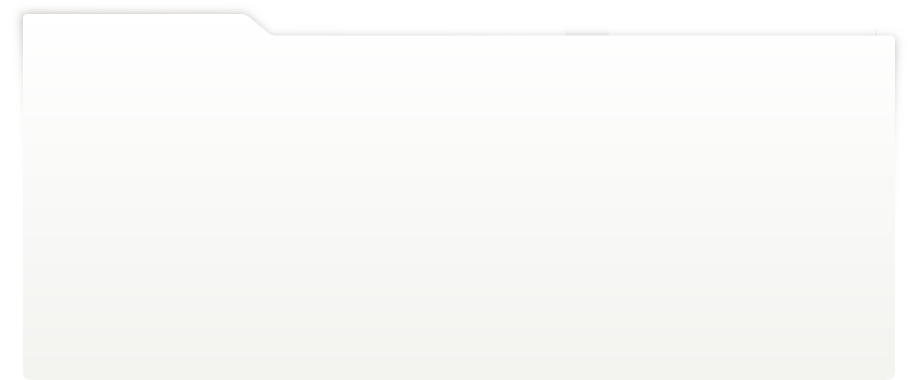
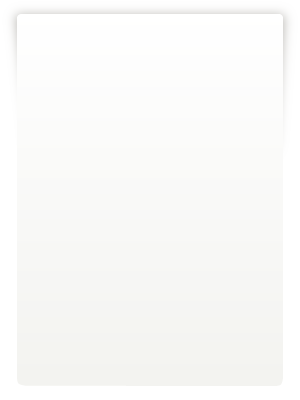
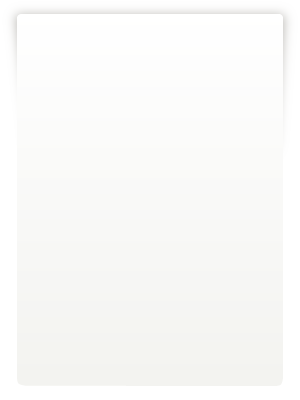
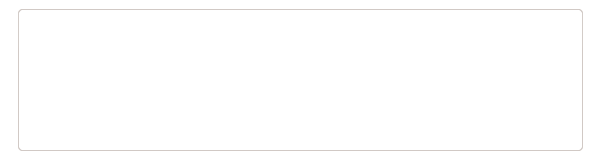
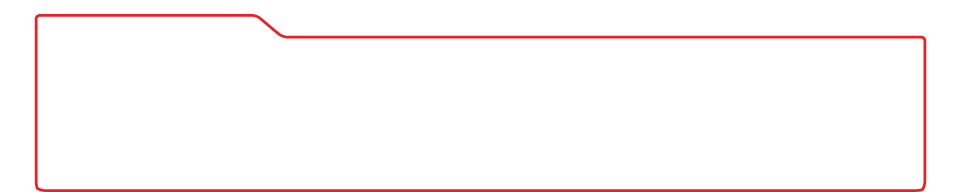
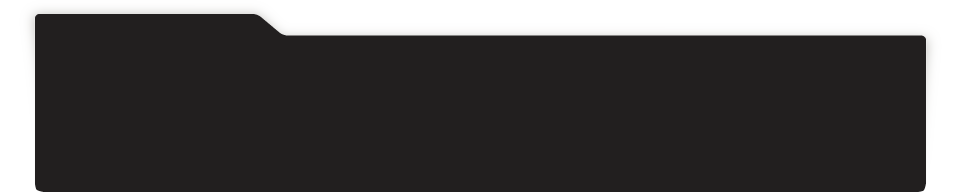
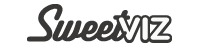
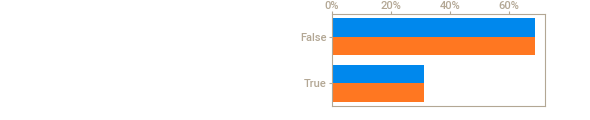
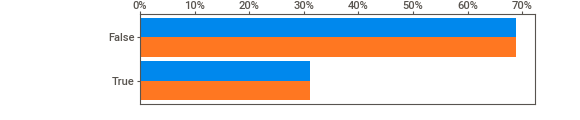
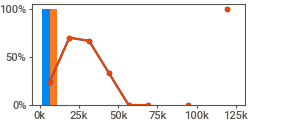
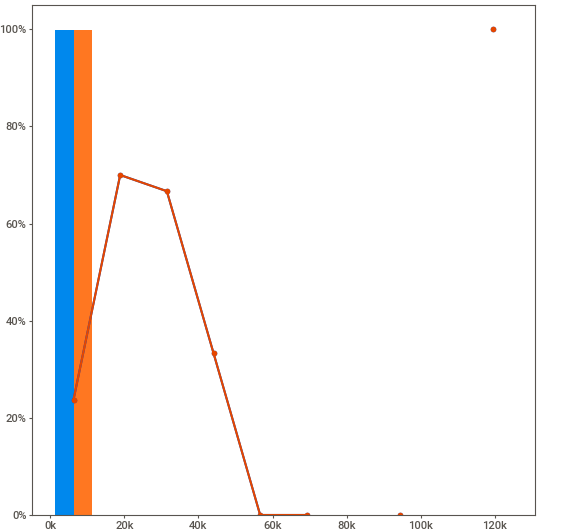
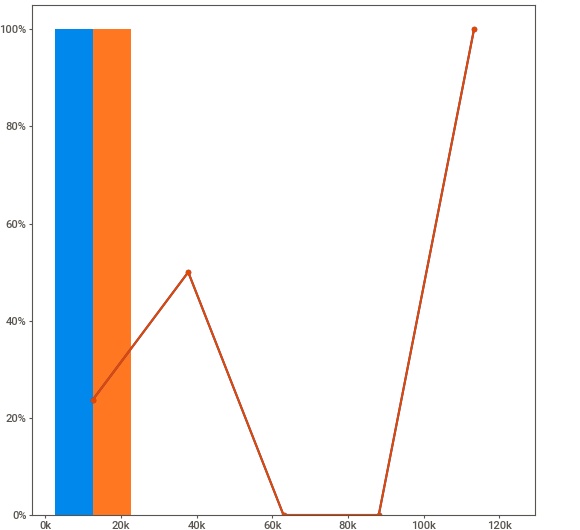
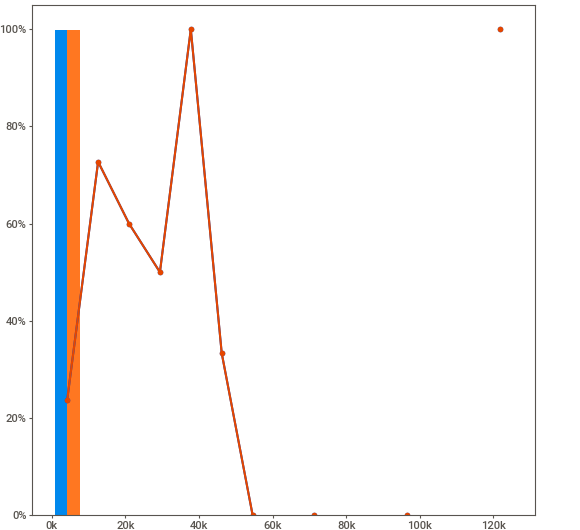
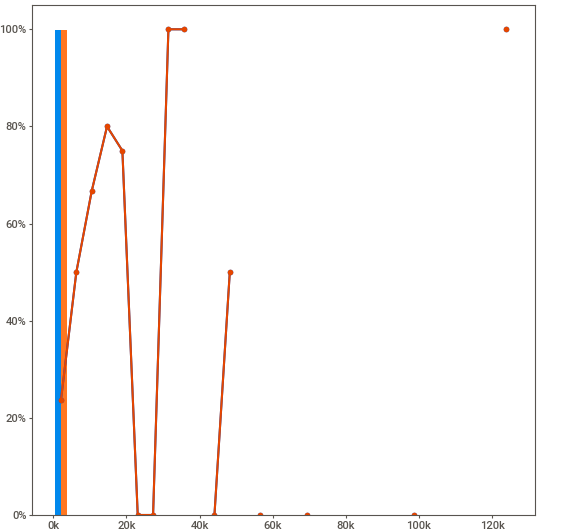
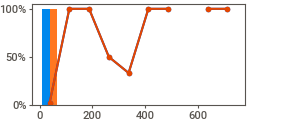
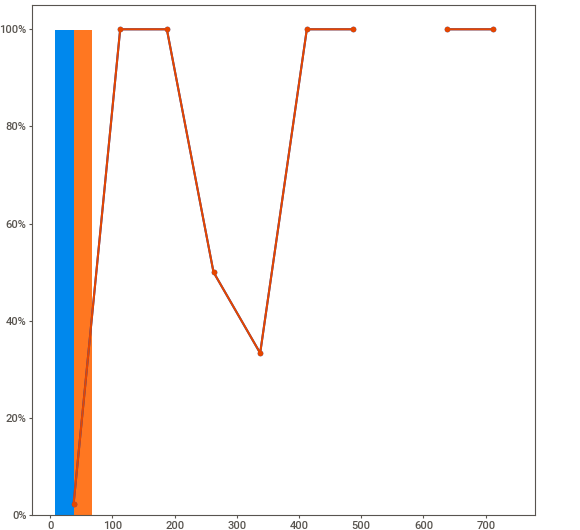
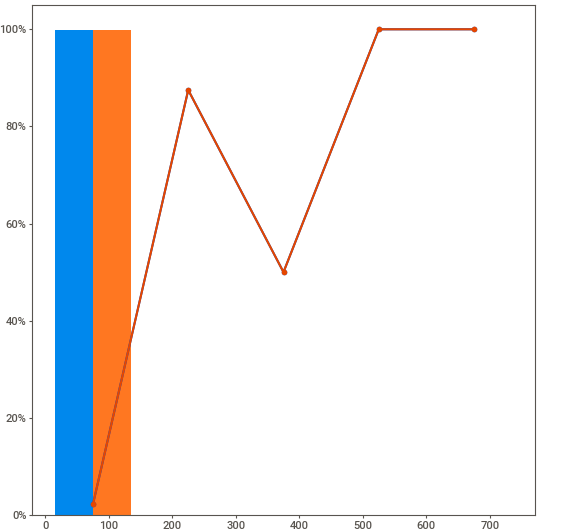
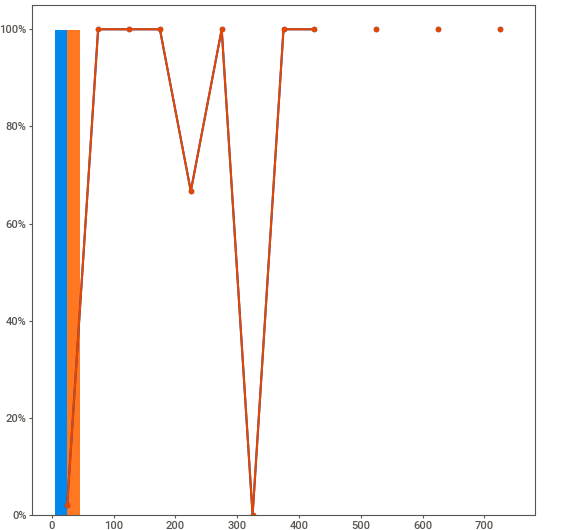
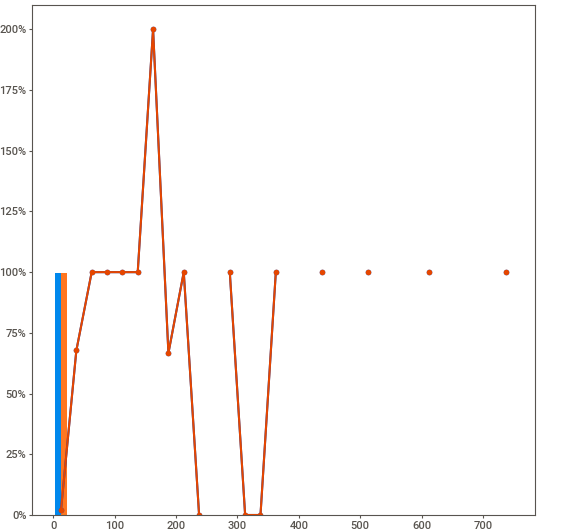
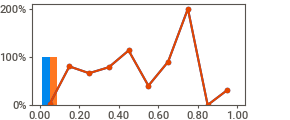
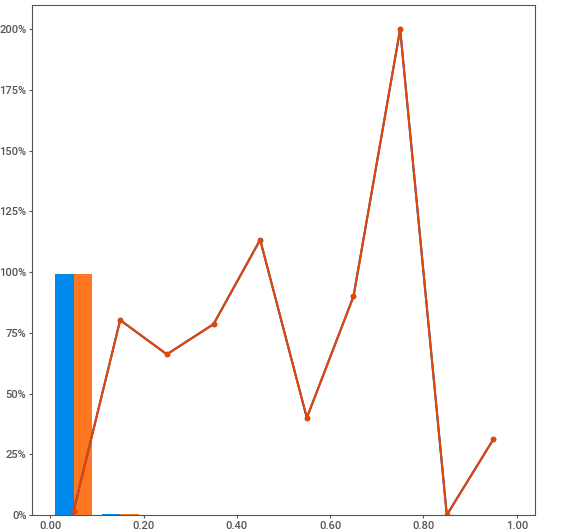
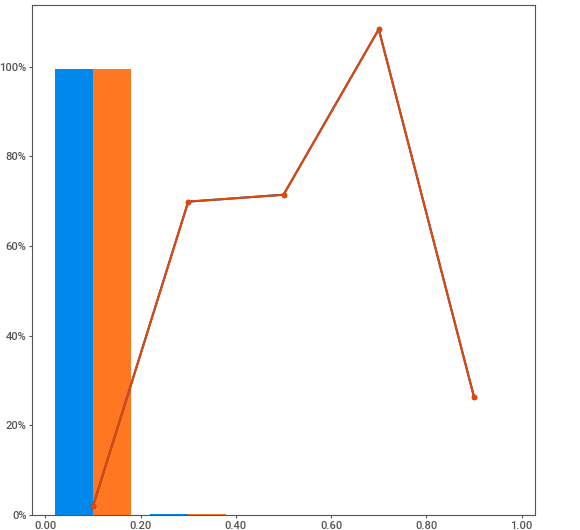
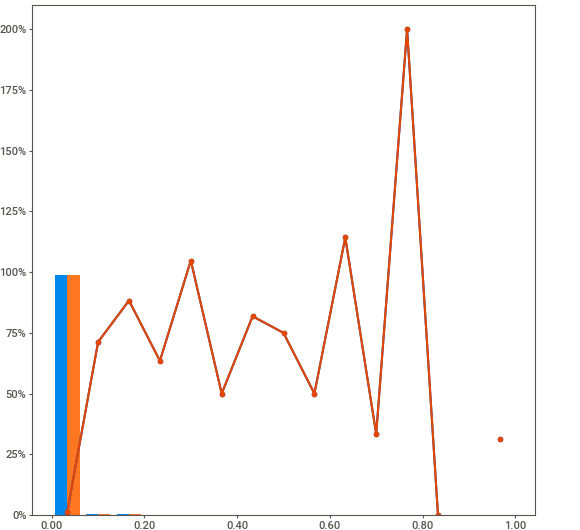
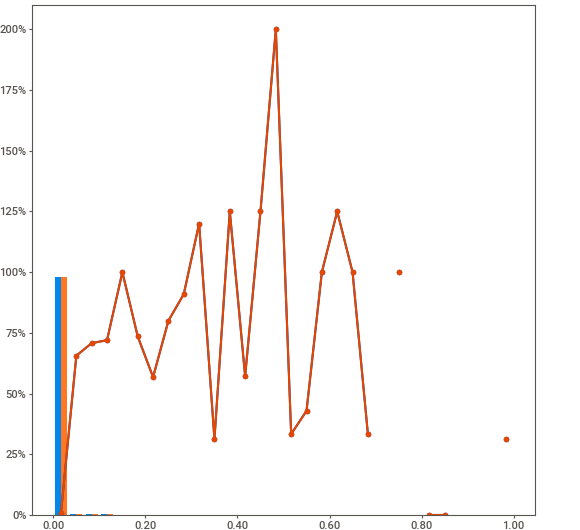
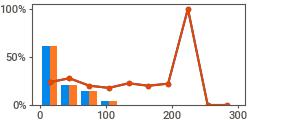
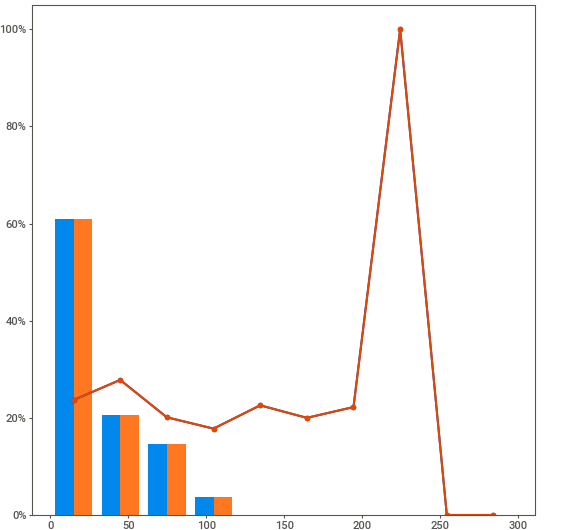
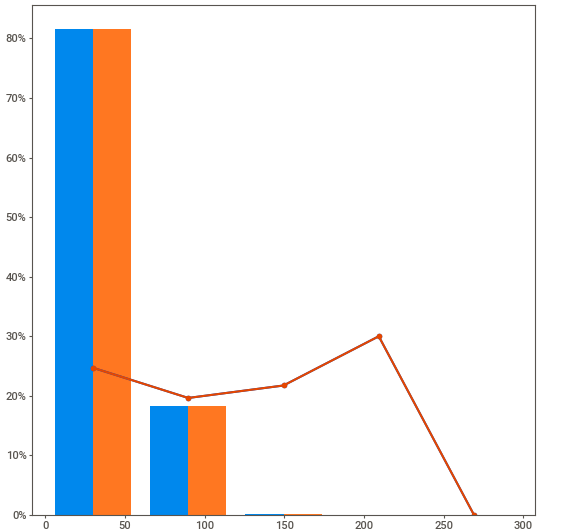
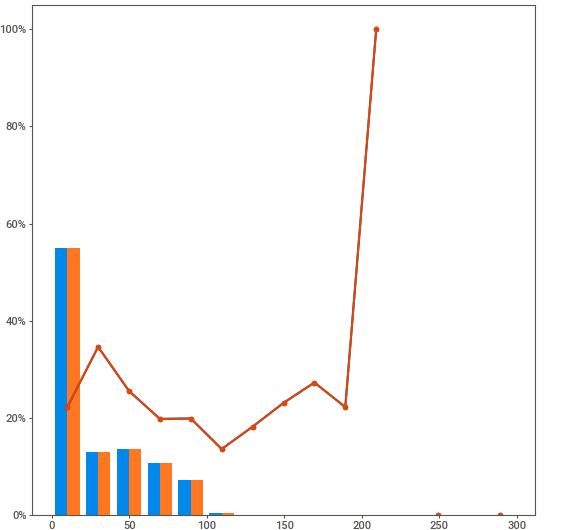
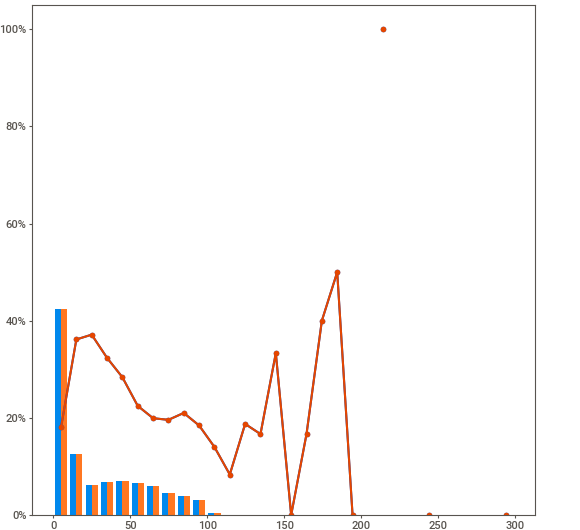
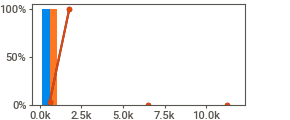
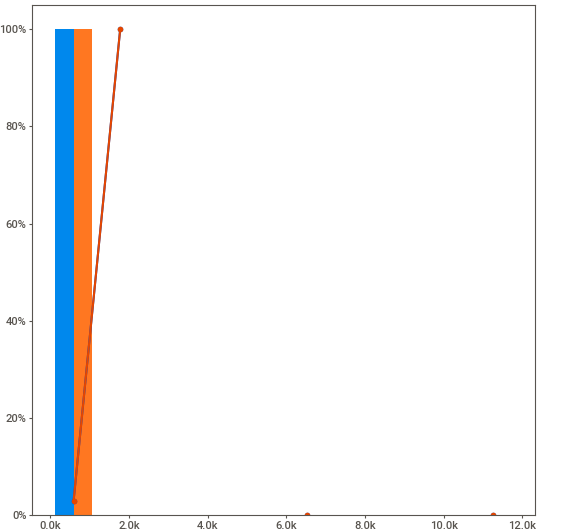
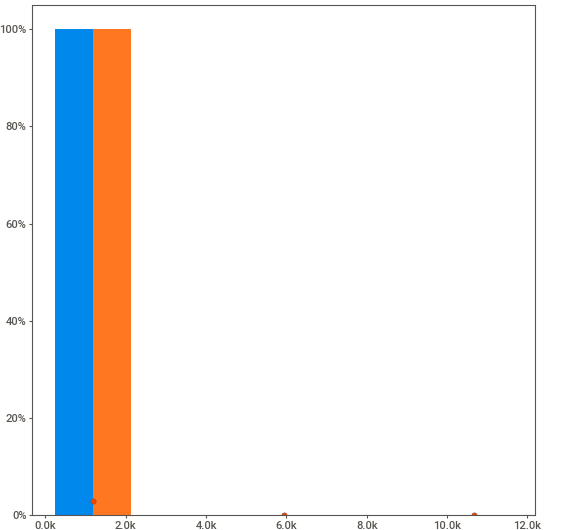
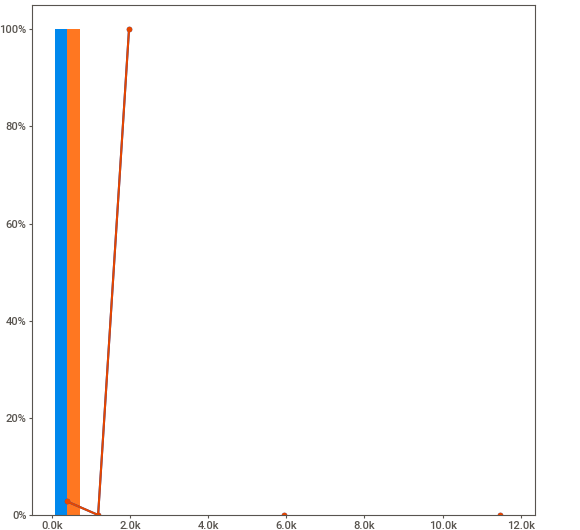
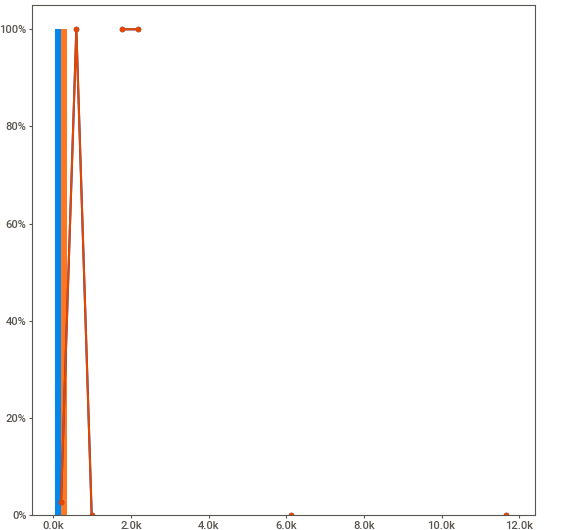
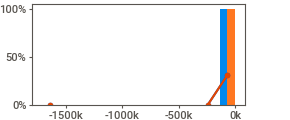
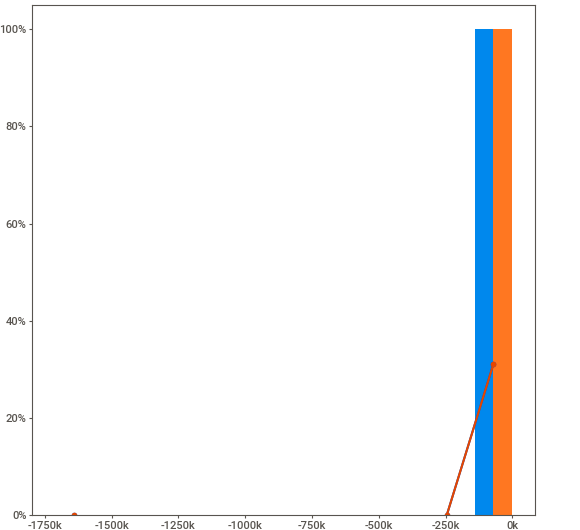
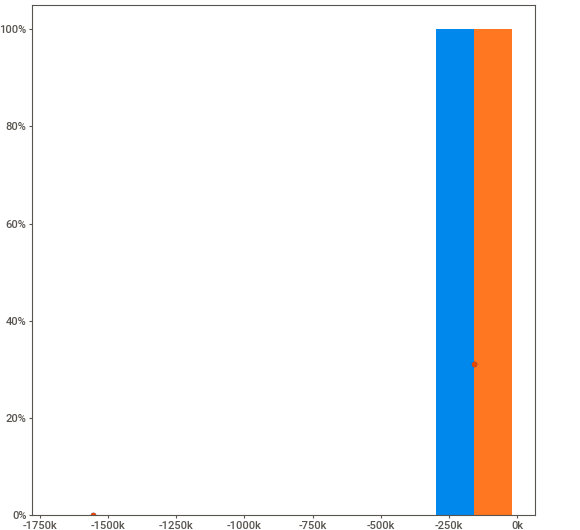
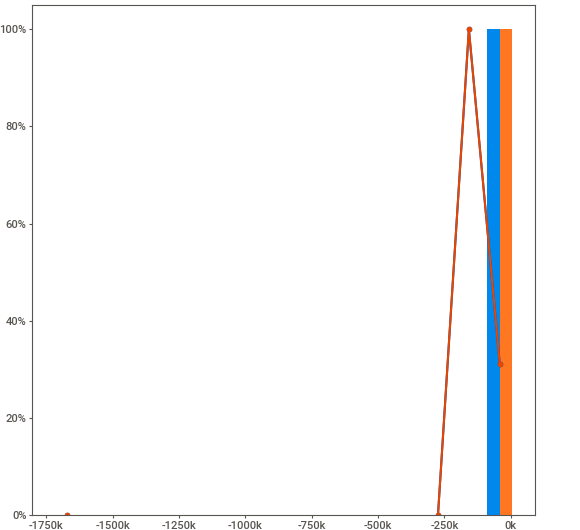
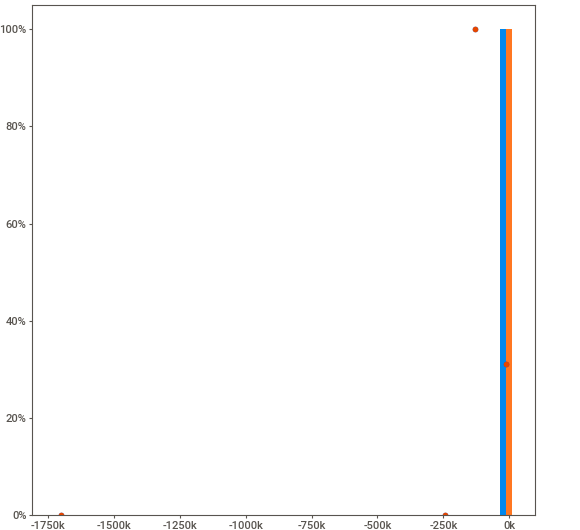
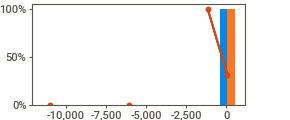
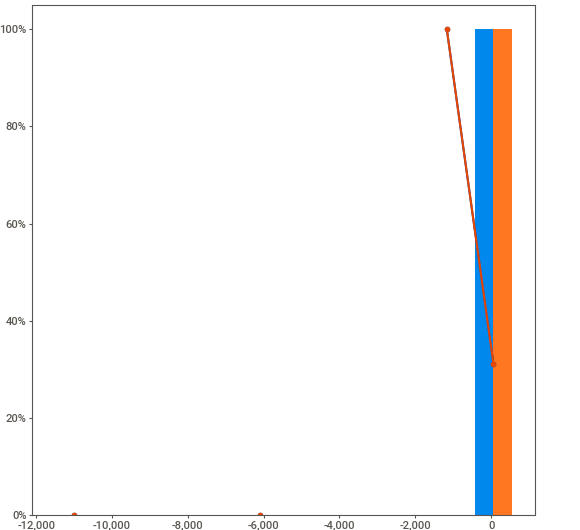
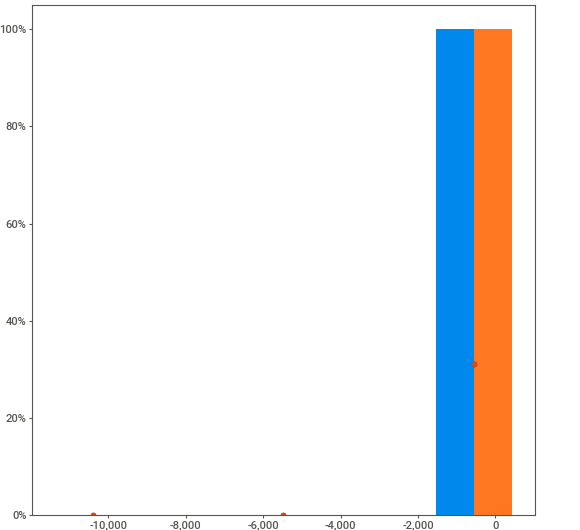
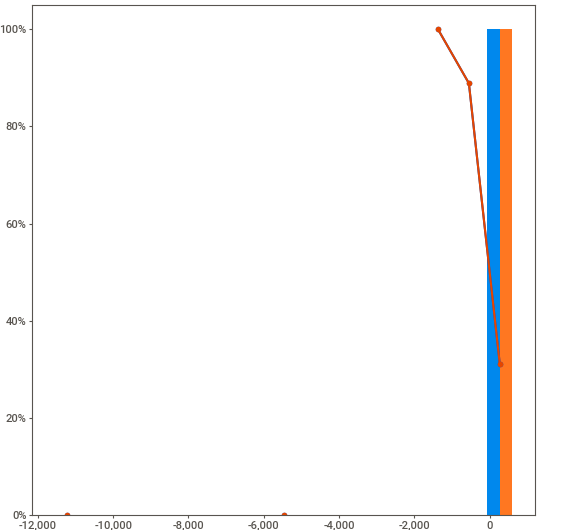
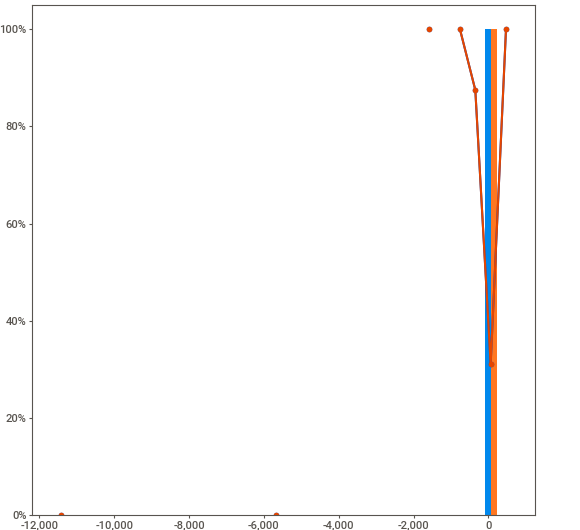
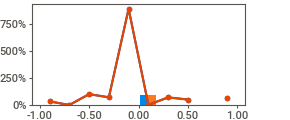
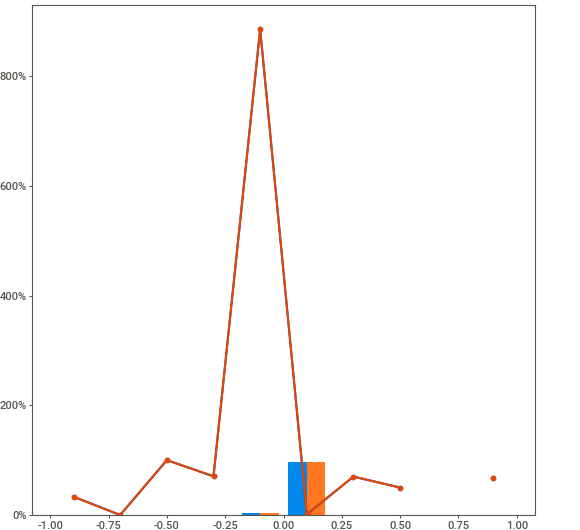
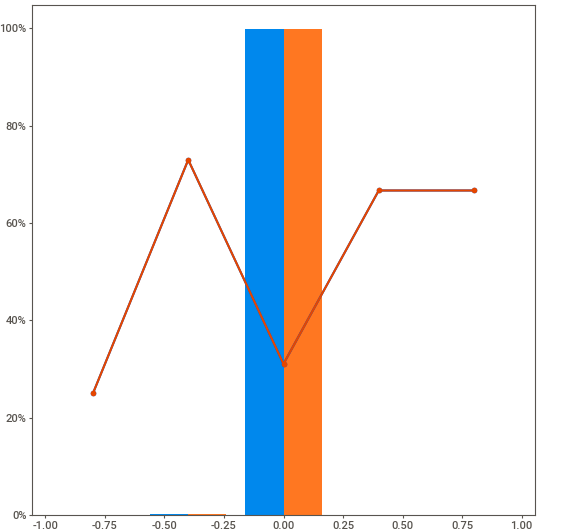
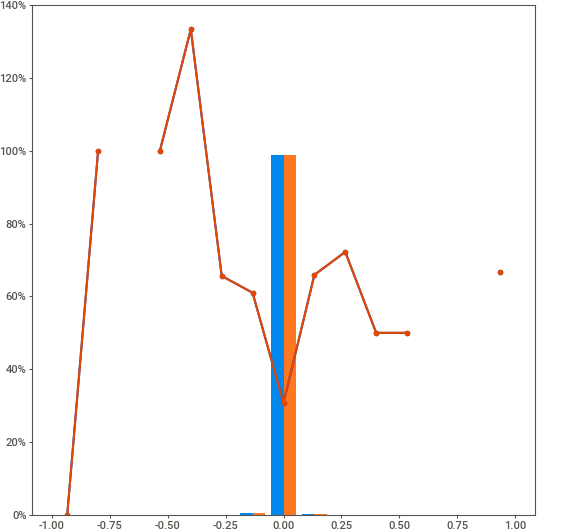
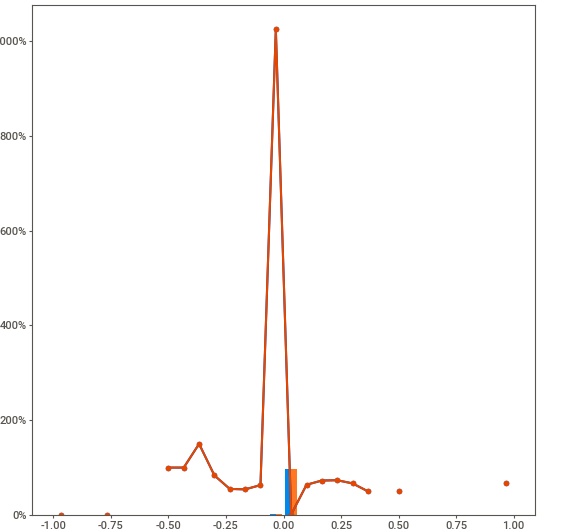
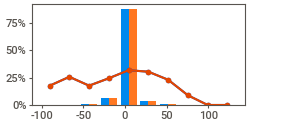
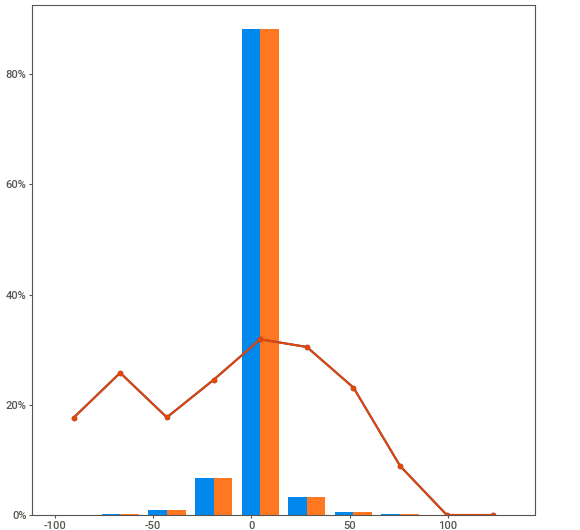
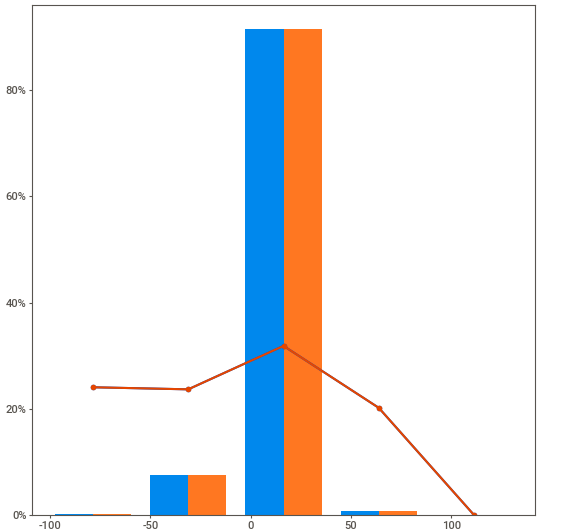
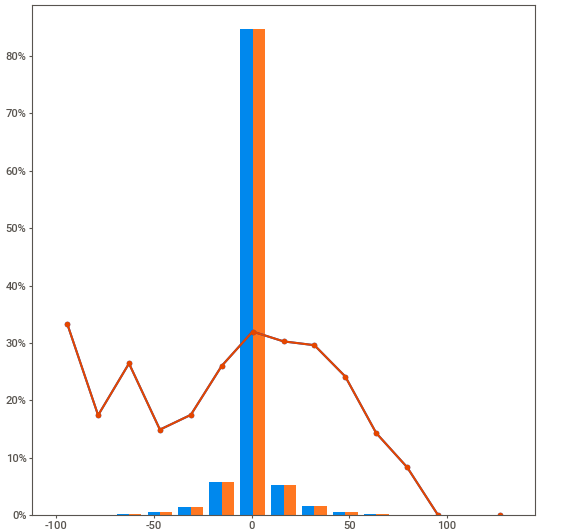
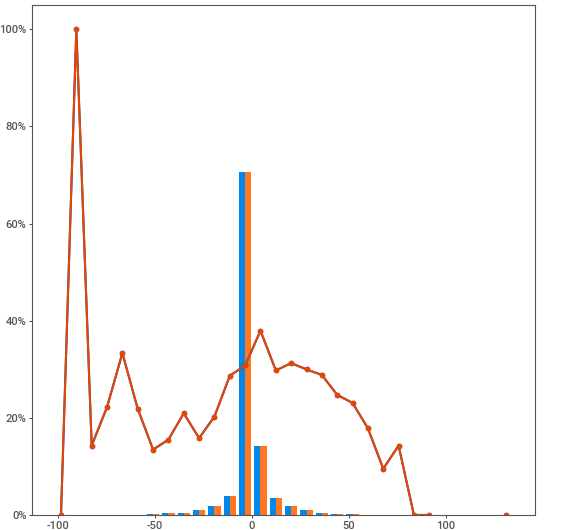
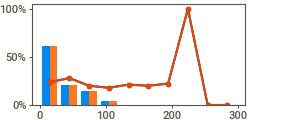
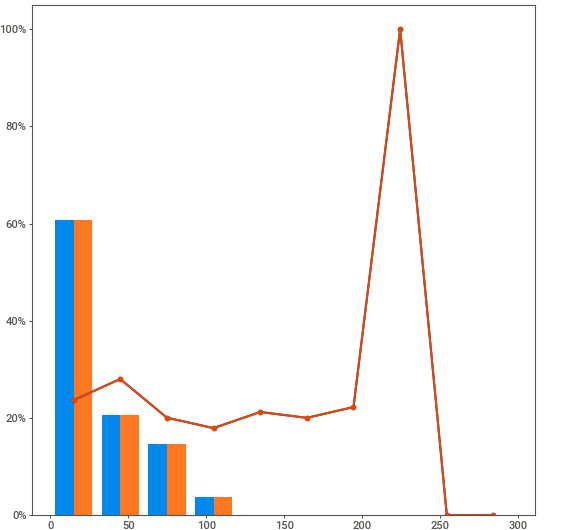
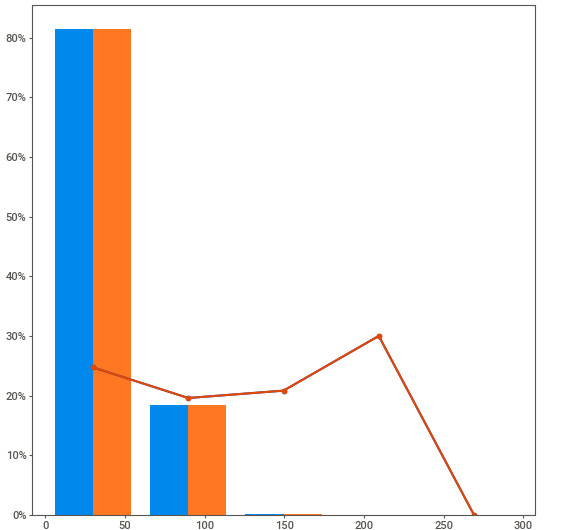
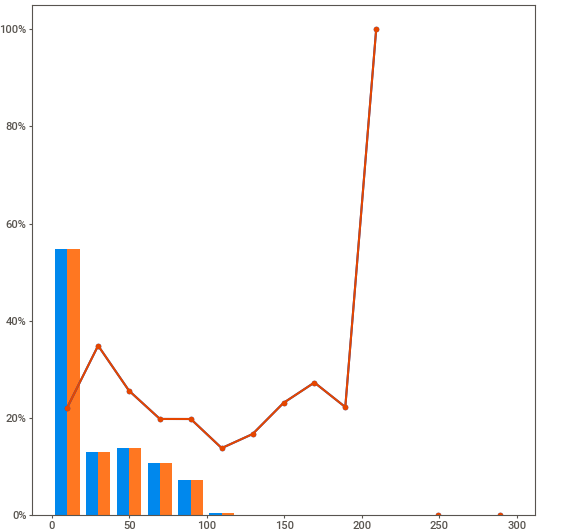
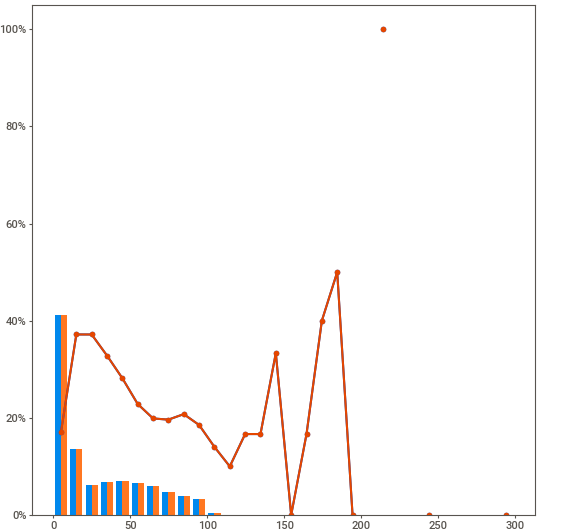
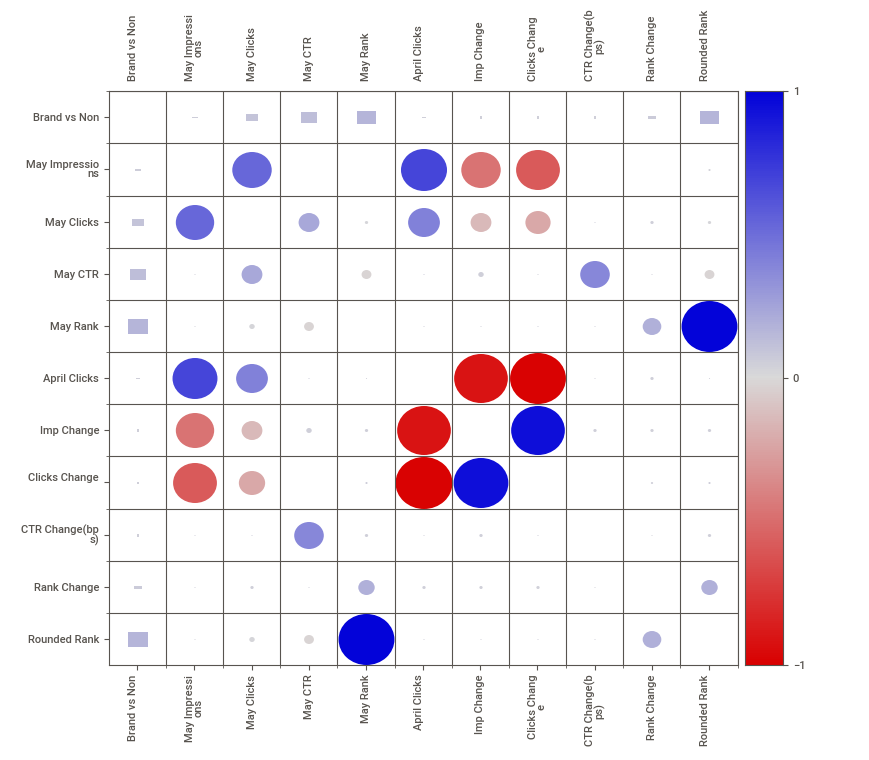
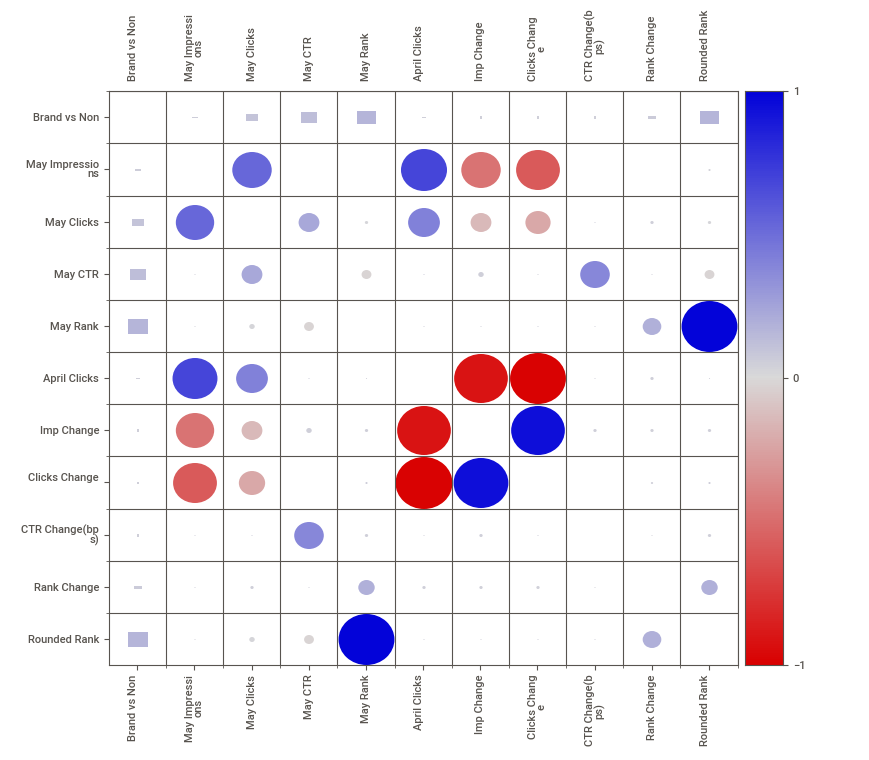

In [ ]:
#Test
comparison = sv.compare([cln,'Rounded Rank'],[cln,'Clicks Change'], target_feat='Brand vs Non')
comparison.show_notebook()